In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("ElectricCarData_Clean.csv")

In [4]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [5]:
df = df[["Brand", "TopSpeed_KmH","FastCharge_KmH", "Efficiency_WhKm", "BodyStyle","Seats", "PriceEuro"]]
df = df.rename({"Efficiency_WhKm": "Efficiency"}, axis=1)
df = df.rename({"TopSpeed_KmH": "TopSpeed"}, axis=1)
df = df.rename({"FastCharge_KmH": "FastCharge"}, axis=1)
df.head()

,Brand,TopSpeed,FastCharge,Efficiency,BodyStyle,Seats,PriceEuro
0,Tesla,233,940,161,Sedan,5,55480
1,Volkswagen,160,250,167,Hatchback,5,30000
2,Polestar,210,620,181,Liftback,5,56440
3,BMW,180,560,206,SUV,5,68040
4,Honda,145,190,168,Hatchback,4,32997


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand       103 non-null    object
 1   TopSpeed    103 non-null    int64 
 2   FastCharge  103 non-null    object
 3   Efficiency  103 non-null    int64 
 4   BodyStyle   103 non-null    object
 5   Seats       103 non-null    int64 
 6   PriceEuro   103 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 5.8+ KB


In [7]:
df = df.dropna()
df.isnull().sum()

Brand         0
TopSpeed      0
FastCharge    0
Efficiency    0
BodyStyle     0
Seats         0
PriceEuro     0
dtype: int64

In [8]:
df['Brand'].value_counts()

Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: Brand, dtype: int64

In [9]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [10]:
Brand_map = shorten_categories(df.Brand.value_counts(), 1)
df['Brand'] = df['Brand'].map(Brand_map)
df.Brand.value_counts()

Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: Brand, dtype: int64

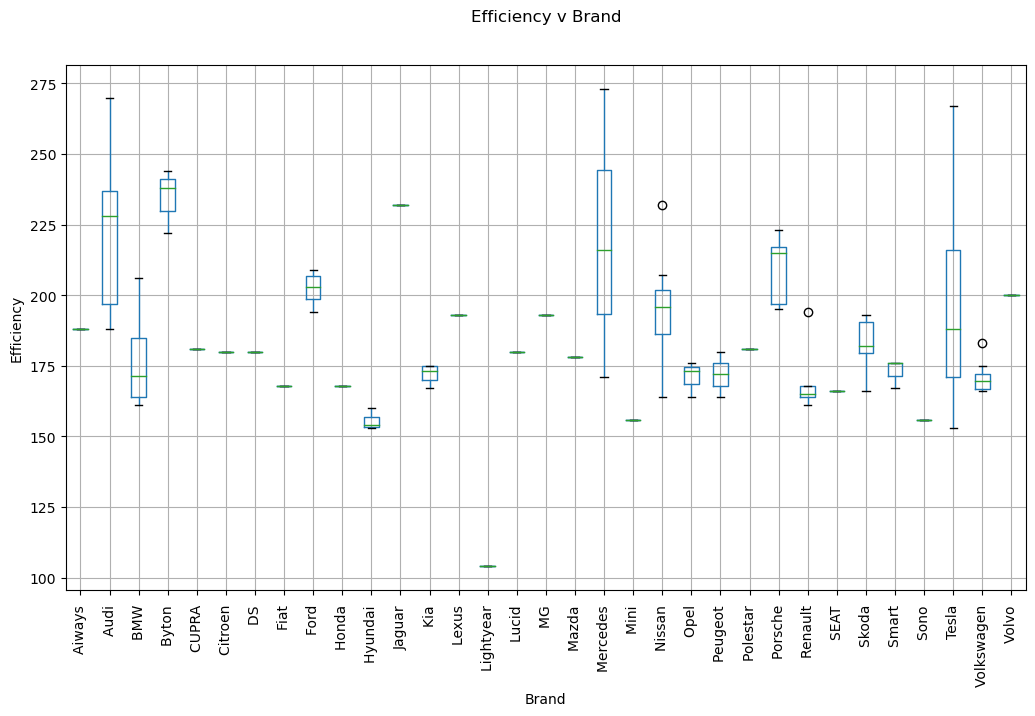

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Efficiency', 'Brand', ax=ax)
plt.suptitle('Efficiency v Brand')
plt.title('')
plt.ylabel('Efficiency')
plt.xticks(rotation=90)
plt.show()

In [12]:
df = df[df["Efficiency"] <= 500]
df = df[df["Efficiency"] >= 50]
df = df[df['Brand'] != 'Other']

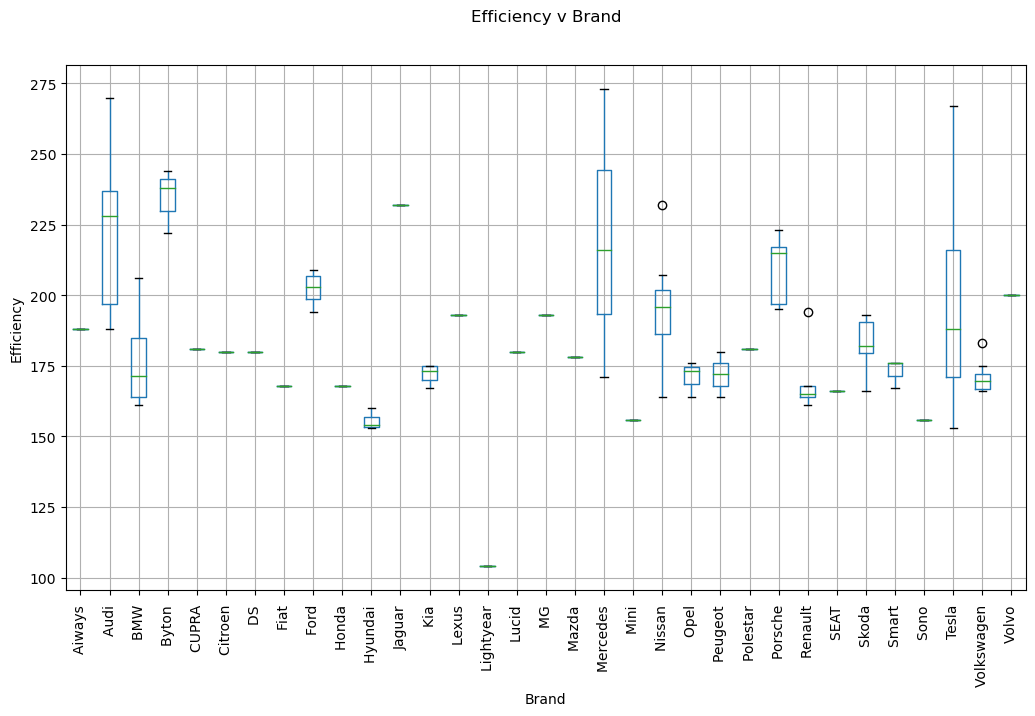

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Efficiency', 'Brand', ax=ax)
plt.suptitle('Efficiency v Brand')
plt.title('')
plt.ylabel('Efficiency')
plt.xticks(rotation=90)
plt.show()

In [14]:
df["PriceEuro"].unique()

array([ 55480,  30000,  56440,  68040,  32997, 105000,  31900,  29682,
        46380,  55000,  69484,  29234,  40795,  65000,  34459,  40936,
       180781,  21421,  31681,  29146,  58620,  35000, 125000,  61480,
        45000,  33000,  60437,  38017,  34361,  67358,  38105,  31184,
        75000,  32646,  37237,  50000,  33133,  79990,  33971,  81639,
        24534,  20129,  36837,  41906, 102945, 149000,  36057,  79445,
       215000,  40000,  85990,  35921,  37422,  24790,  96990,  65620,
        75351,  54475, 109302,  33246,  38000,  62900,  41526, 150000,
        64000,  25500,  34400,  57500,  22030,  54000, 148301,  38987,
       102990,  21387,  46900,  70631,  34900,  69551,  47500,  37500,
        93800,  24565,  37900,  35575,  53500,  96050,  62000],
      dtype=int64)

In [15]:
df["Efficiency"].unique()

array([161, 167, 181, 206, 168, 180, 164, 153, 193, 216, 160, 178, 175,
       223, 166, 156, 171, 179, 197, 183, 200, 231, 173, 165, 267, 172,
       184, 154, 228, 195, 104, 188, 237, 176, 211, 177, 198, 232, 261,
       194, 209, 217, 244, 215, 273, 256, 219, 270, 207, 170, 222, 191,
       258, 238], dtype=int64)

In [17]:
df["TopSpeed"].unique()


array([233, 160, 210, 180, 145, 250, 150, 225, 144, 167, 200, 165, 260,
       130, 140, 217, 240, 261, 190, 135, 157, 155, 410, 241, 123],
      dtype=int64)

In [18]:
from sklearn.preprocessing import LabelEncoder
le_TopSpeed = LabelEncoder()
df['TopSpeed'] = le_TopSpeed.fit_transform(df['TopSpeed'])
df["TopSpeed"].unique()

array([18,  9, 15, 12,  5, 21,  6, 17,  4, 11, 14, 10, 22,  1,  3, 16, 19,
       23, 13,  2,  8,  7, 24, 20,  0], dtype=int64)

In [19]:
le_FastCharge = LabelEncoder()
df['FastCharge'] = le_FastCharge.fit_transform(df['FastCharge'])
df["FastCharge"].unique()

array([50,  7, 36, 32,  2,  4, 19, 37, 30, 21,  5, 16,  3, 34, 42,  1,  8,
       49, 44, 47, 26, 24,  9, 22, 14, 38,  6, 17, 33, 35, 13, 39, 48,  0,
       31, 46, 29, 20, 45, 18, 41, 23, 15, 43, 25, 10, 12, 40, 28, 11, 27])

In [20]:
le_BodyStyle = LabelEncoder()
df['BodyStyle'] = le_BodyStyle.fit_transform(df['BodyStyle'])
df["BodyStyle"].unique()

array([7, 1, 2, 6, 4, 3, 0, 5, 8])

In [21]:
le_Seats = LabelEncoder()
df['Seats'] = le_Seats.fit_transform(df['Seats'])
df["Seats"].unique()

array([2, 1, 4, 3, 0], dtype=int64)

In [22]:
le_PriceEuro = LabelEncoder()
df['PriceEuro'] = le_PriceEuro.fit_transform(df['PriceEuro'])
df["PriceEuro"].unique()

array([52, 11, 53, 64, 16, 79, 14, 10, 44, 51, 65,  9, 39, 61, 23, 40, 85,
        2, 13,  8, 55, 25, 81, 57, 43, 17, 56, 35, 21, 63, 36, 12, 68, 15,
       30, 47, 18, 71, 20, 72,  4,  0, 29, 42, 77, 83, 28, 70, 86, 38, 73,
       27, 31,  6, 76, 62, 69, 50, 80, 19, 34, 59, 41, 84, 60,  7, 22, 54,
        3, 49, 82, 37, 78,  1, 45, 67, 24, 66, 46, 32, 74,  5, 33, 26, 48,
       75, 58], dtype=int64)

In [23]:
le_Brand = LabelEncoder()
df['Brand'] = le_Brand.fit_transform(df['Brand'])
df["Brand"].unique()

array([30, 31, 23,  2,  9, 15, 22,  1, 18, 20, 10, 24, 16, 19, 21, 27, 32,
       12, 25, 17, 13,  4, 26, 14,  0,  6,  5, 11,  8,  3, 29, 28,  7])

In [24]:
X = df.drop("Brand", axis=1)
y = df["Brand"]

In [25]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression()

In [26]:
y_pred = linear_reg.predict(X)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [28]:
error

8.642169027576022

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [30]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("{:,.02f}".format(error))

5.12


In [31]:
X

,TopSpeed,FastCharge,Efficiency,BodyStyle,Seats,PriceEuro
0,18,50,161,7,2,52
1,9,7,167,1,2,11
2,15,36,181,2,2,53
3,12,32,206,6,2,64
4,5,2,168,1,1,16
...,...,...,...,...,...,...
98,9,21,191,1,2,43
99,15,30,258,6,2,75
100,14,21,194,1,2,47
101,14,22,232,1,2,61


In [32]:
print(le_Brand.classes_.tolist())

['Aiways ', 'Audi ', 'BMW ', 'Byton ', 'CUPRA ', 'Citroen ', 'DS ', 'Fiat ', 'Ford ', 'Honda ', 'Hyundai ', 'Jaguar ', 'Kia ', 'Lexus ', 'Lightyear ', 'Lucid ', 'MG ', 'Mazda ', 'Mercedes ', 'Mini ', 'Nissan ', 'Opel ', 'Peugeot ', 'Polestar ', 'Porsche ', 'Renault ', 'SEAT ', 'Skoda ', 'Smart ', 'Sono ', 'Tesla ', 'Volkswagen ', 'Volvo ']


In [33]:
print(le_TopSpeed.classes_.tolist())

[123, 130, 135, 140, 144, 145, 150, 155, 157, 160, 165, 167, 180, 190, 200, 210, 217, 225, 233, 240, 241, 250, 260, 261, 410]


In [34]:
print(le_FastCharge.classes_.tolist())

['-', '170', '190', '210', '220', '230', '240', '250', '260', '270', '290', '320', '330', '340', '350', '360', '380', '390', '410', '420', '430', '440', '450', '460', '470', '480', '490', '500', '510', '520', '540', '550', '560', '570', '590', '610', '620', '650', '710', '730', '740', '770', '780', '810', '850', '890', '900', '910', '920', '930', '940']


In [35]:
print(le_BodyStyle.classes_.tolist())

['Cabrio', 'Hatchback', 'Liftback', 'MPV', 'Pickup', 'SPV', 'SUV', 'Sedan', 'Station']


In [36]:
print(le_Seats.classes_.tolist())

[2, 4, 5, 6, 7]


In [37]:
print(le_PriceEuro.classes_.tolist())

[20129, 21387, 21421, 22030, 24534, 24565, 24790, 25500, 29146, 29234, 29682, 30000, 31184, 31681, 31900, 32646, 32997, 33000, 33133, 33246, 33971, 34361, 34400, 34459, 34900, 35000, 35575, 35921, 36057, 36837, 37237, 37422, 37500, 37900, 38000, 38017, 38105, 38987, 40000, 40795, 40936, 41526, 41906, 45000, 46380, 46900, 47500, 50000, 53500, 54000, 54475, 55000, 55480, 56440, 57500, 58620, 60437, 61480, 62000, 62900, 64000, 65000, 65620, 67358, 68040, 69484, 69551, 70631, 75000, 75351, 79445, 79990, 81639, 85990, 93800, 96050, 96990, 102945, 102990, 105000, 109302, 125000, 148301, 149000, 150000, 180781, 215000]


In [38]:
Efficiency = df["Efficiency"]

In [39]:
X = np.array([[135, '250',180, 'SUV',5,38017]])
X

array([['135', '250', '180', 'SUV', '5', '38017']], dtype='<U11')

In [40]:
X[:, 0] = le_TopSpeed.transform(X[:, 0])
X[:, 1] = le_FastCharge.transform(X[:, 1])
X[:, 3] = le_BodyStyle.transform(X[:, 3])
X[:, 4] = le_Seats.transform(X[:, 4])
X[:, 5] = le_PriceEuro.transform(X[:, 5])
X = X.astype(float)
X 

array([[  2.,   7., 180.,   6.,   2.,  35.]])

In [41]:
y_pred = regressor.predict(X)
Z=int(y_pred[0])
Z

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


12

In [42]:
list(le_Brand.inverse_transform([Z]))

['Kia ']

In [43]:
import pickle

In [44]:
data = {"model": regressor, "le_TopSpeed": le_TopSpeed, "le_FastCharge": le_FastCharge,"Efficiency":Efficiency,"le_BodyStyle":le_BodyStyle,"le_Seats":le_Seats ,"le_PriceEuro":le_PriceEuro}
with open('survey_sparrow.pkl', 'wb') as file:
    pickle.dump(data, file)

In [45]:
with open('survey_sparrow.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_TopSpeed = data["le_TopSpeed"]
le_FastCharge = data["le_FastCharge"]
Efficiency  =  data["Efficiency"]
le_BodyStyle = data["le_BodyStyle"]
le_Seats = data["le_Seats"]
le_PriceEuro = data["le_PriceEuro"]

In [46]:
y_pred = regressor_loaded.predict(X)
y_pred[0]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


12.125

In [51]:
U=list(le_Brand.inverse_transform([Z]))
U

['Kia ']

In [62]:
C=U[0]
C[0:]


'Kia '

In [175]:
list(Efficiency)

[161,
 167,
 181,
 206,
 168,
 180,
 168,
 164,
 153,
 193,
 216,
 164,
 160,
 178,
 153,
 175,
 223,
 166,
 193,
 156,
 164,
 171,
 179,
 197,
 167,
 183,
 166,
 200,
 161,
 180,
 231,
 173,
 165,
 267,
 178,
 172,
 193,
 181,
 168,
 171,
 184,
 154,
 228,
 166,
 166,
 175,
 173,
 195,
 104,
 188,
 237,
 206,
 176,
 183,
 211,
 168,
 180,
 164,
 180,
 188,
 161,
 177,
 198,
 232,
 200,
 197,
 200,
 261,
 194,
 209,
 165,
 193,
 217,
 244,
 156,
 167,
 188,
 176,
 206,
 215,
 171,
 216,
 167,
 194,
 273,
 168,
 256,
 219,
 193,
 181,
 270,
 176,
 175,
 207,
 168,
 171,
 170,
 222,
 191,
 258,
 194,
 232,
 238]